# Predicting Credit Default Using Decision Trees and Random Forests

### Introduction

In this project, I aim to build predictive models that determine whether a borrower will meet their obligation of repaying their loan. I will explore publicly available data from LendingClub.com, a platform that connects borrowers with investors, and investigate various borrower attributes to create accurate models for credit default prediction.

To perform the classification task, I will utilize popular machine learning algorithms, namely decision trees and random forests. By analyzing features such as credit policy, purpose of the loan, interest rate, income, credit score, and more, I will train and evaluate these models to predict whether a borrower will repay their loan in full.

My primary goal is to assist investors in identifying borrowers with a higher probability of loan repayment, which can be instrumental in making informed investment decisions.

Let's dive into the data analysis and modeling process and uncover valuable insights from the dataset!


### Step 1: Importing Data & Relevant Libraries 

Under this section, I will import all the necessary Python libraries for loading our data into a pandas DataFrame. Using these libraries, we will explore our data, visualize it, and create models in the succeeding sections. The key libraries we will be using include ;

 - pandas
 - numpy
 - matplotlib
 - Seaborn

In [478]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [479]:
# Loading dataset into a pandas DataFrame
df=pd.read_csv('loan_data.csv')

## Step 2: Checking for Quality Issues 

Now that we have loaded our dataset into a pandas DataFrame, our next step is to inspect it for any quality issues before further exploration. In this project, my cleaning efforts will primarily focus on addressing duplicates and handling missing values. However, it is important to note that for achieving optimum model performance, outlier treatment might also be necessary. 

By addressing these issues, we can ensure the reliability and accuracy of our data, which will be crucial for building effective predictive models.

In [480]:
# Checking for nulls
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

From the output above, it is evident that our data contains no missing values. Now, let's proceed and check for any duplicates in the dataset to ensure data integrity and consistency.

In [481]:
# Checking for duplicates
df.duplicated().sum()

0

Our data has no duplicates, and we have successfully addressed the issue of missing values. Now that our dataset is clean and ready for analysis, we can move forward with data exploration and visualization.

## Step 3: Exploratory Data Analysis & Visualization 

Under this section, we will embark on the exciting journey of exploring our dataset. Our objective is to uncover relationships between variables and understand their distribution concerning the target variable. By conducting thorough data exploration, we can gain valuable insights into how various features influence the likelihood of credit default. 

This analysis will provide us with a better understanding of the underlying patterns in the data and help us make informed decisions during the modeling phase. Let's dive in and uncover the hidden gems within our dataset!

In [482]:
# Checking shape of our dataset 
df.shape

(9578, 14)

The results from the query above indicates that our DataFrame, referred to as "df," contains 9578 rows and 14 columns.

The number 9578 represents the total number of rows or observations in the DataFrame. Each row corresponds to a unique data point or entry in our dataset.

The number 14 represents the total number of columns or attributes in the DataFrame. Each column represents a specific variable or feature associated with each data point.

In [483]:
# Checking the first 5 rows in our dataset
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [484]:
# Getting more info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


The structure of our dataset, as shown by the output from df.info(), is as follows:

The dataset contains a total of 9578 records (rows).
There are 14 columns, each representing a different attribute or feature of the borrowers or loan applications.
The data types of the columns are as follows:
- Integer (int64) data type: credit.policy, fico, revol.bal, inq.last.6mths, delinq.2yrs, pub.rec, and not.fully.paid.
- Float (float64) data type: int.rate, installment, log.annual.inc, dti, days.with.cr.line, and revol.util.
- Object data type: purpose, which likely represents the purpose of the loan and is represented as text or categorical data.

Each column has a non-null count of 9578, indicating that there are no missing values in the dataset. This structured information gives us an overview of the attributes and their data types, which will be valuable during data exploration and modeling processes.

### Data Visualization

# Exploring Dataset Visualizations

Now that we have a basic understanding of the structure of our dataset, let's proceed and plot visualizations to showcase the distribution of variables and explore any existing relationships between them.

## Univariate Visualizations

- Count plot of credit policy to visualize the number of borrowers who took credit or not.
- Count plot for repayment outcomes to understand the distribution of outcomes, i.e., defaults and repaid, in our dataset.
- Count plot to showcase the various reasons why borrowers took out loans.
- A histogram to showcase the distribution of interest rates among borrowers.
- A histogram to show the distribution of repayment/installment amounts.

## Bivariate Visualizations

- Count plot of reasons why borrowers took out loans vs. the repayment outcome, i.e., whether they repaid or defaulted.
- Distribution of interest rates charged to borrowers, comparing the repayment outcome using a histogram.
- Histogram to show the distribution of monthly installment amounts, comparing them with the repayment outcome.
- Histogram to showcase the distribution of the FICO score vs. the repayment outcome.
- Joint plots to showcase the relationship between the FICO score and the interest rate charged on borrowers.
- Joint plot to explore the relationship between the number of days a client has a credit line and the interest rate charged.
- A joint plot to showcase the relationship between the FICO score and the debt-to-income ratio.

These visualizations will allow us to gain valuable insights into the data distribution, identify any trends, and observe potential correlations between different variables. Let's proceed with creating these visualizations to uncover meaningful patterns in our dataset.


#### Plot 1: Count Plot to Show the Distribution of Credit Policy among Borrowers

In [485]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

A count plot is a type of bar plot that displays the frequency count of different categories in a categorical variable. In this case, we are showing the distribution of the "credit policy" variable with two classes: 0 and 1.

The data provided indicates the counts for each class:

Class 1: There are 7710 instances with a credit policy value of 1.
Class 0: There are 1868 instances with a credit policy value of 0.
To visualize this information, we will create a count plot with two bars, one representing class 1 and the other representing class 0. The height of each bar will correspond to the count of instances for that particular class.

In the count plot, the y-axis will represent the count or frequency, and the x-axis will represent the two classes (0 and 1) of the "credit policy" variable. The plot will look something like this: 

Text(0.5, 1.0, 'Distribution of Credit Policy Classes')

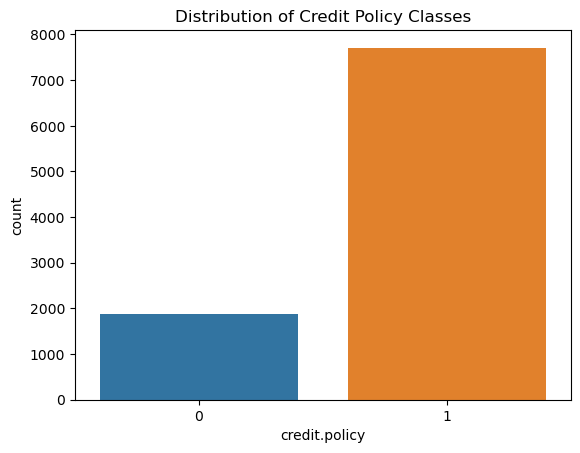

In [486]:
# Distribution of Policy types
sns.countplot(x=df['credit.policy']).set_title("Distribution of Credit Policy Classes")

In this plot, the first bar represents class 0 with a height of 1868, and the second bar represents class 1 with a height of 7710. Indicating that there are more borrowers with credit policy 1 than policy 0.

#### Plot 2: Count plot to show Distribution of Repayment Outcomes 

In [487]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Text(0.5, 1.0, 'Distribution of Repayment Outcomes')

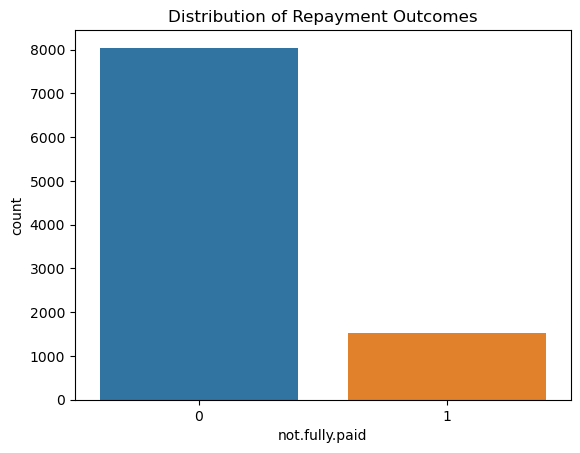

In [488]:
# Distribution of repayment outcomes 
sns.countplot(x=df['not.fully.paid']).set_title("Distribution of Repayment Outcomes")

From the above count plot, we observe that there is a huge class imbalance between two repayment outcomes. Majority of the borrowers, 8,045 defaulted on their loans while only 1,533 borrowers repaid their loans.  

#### Plot 3: Count plot for Distribution of Loan Purpose 

In [489]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

Text(0.5, 1.0, 'Distribution of Loan Purpose')

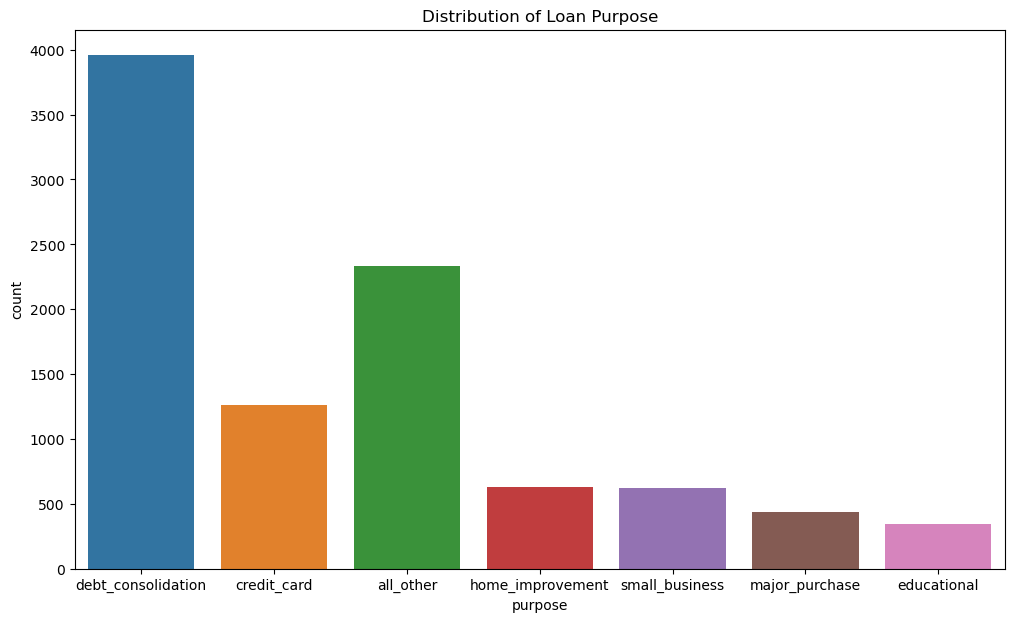

In [490]:
#Distribution of Loan purpose 
plt.figure(figsize=[12,7])
sns.countplot(x=df['purpose']).set_title("Distribution of Loan Purpose")

From the plot above we see that the number of borrowers who took out loans for various reasons compared as follows:

- debt_consolidation    3957
- all_other             2331
- credit_card           1262
- home_improvement       629
- small_business         619
- major_purchase         437
- educational            343

#### Plot 4: A histogram to Show the Distribution of Interest Rates among borrowers 

In [491]:
df['int.rate'].describe()

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

Text(0.5, 1.0, 'Distribution of Interest Rates')

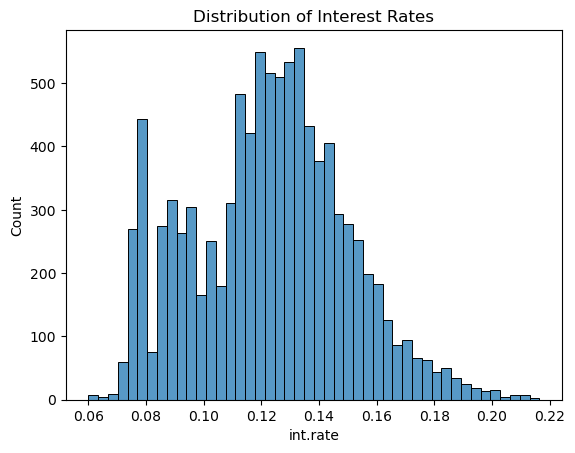

In [492]:
sns.histplot(x=df['int.rate']).set_title("Distribution of Interest Rates")

From the histogram above, we see that interest rates among borrowers is normally distributed around the mean of 0.122640. The borrower who was exposed to the highest interest rate paid back an interest of 0.216400 while the least exposed borrower paid an interest of 0.060000

#### Plot 5: A histogram to Show the Distribution of Monthly Installments paid by borrowers 

In [493]:
df['installment'].describe()

count    9578.000000
mean      319.089413
std       207.071301
min        15.670000
25%       163.770000
50%       268.950000
75%       432.762500
max       940.140000
Name: installment, dtype: float64

Text(0.5, 1.0, 'Distribution of Monthly Installments')

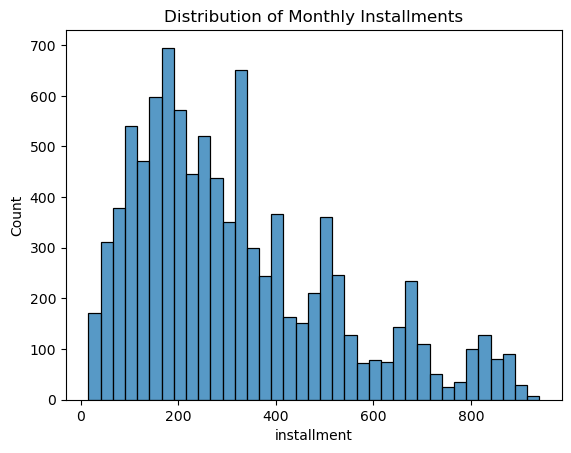

In [494]:
sns.histplot(x=df['installment']).set_title("Distribution of Monthly Installments")

The monthly installment paid by borrowers follows a normal distribution around the mean of 319.089413 with a maximum installment of 940.140000 and a minimum installment of 15.670000. 

#### Plot 6: A Clustered count Plot showing the distribution of loan repayment outcomes based on the purpose the loan was taken for. 

Text(0.5, 1.0, 'Loan Purpose vs Repayment Status')

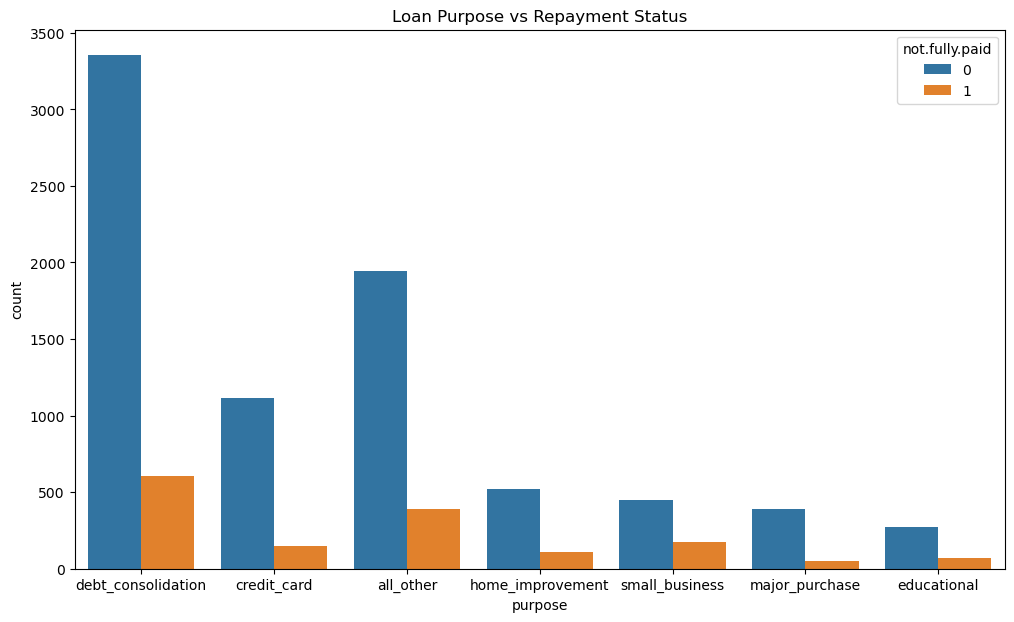

In [495]:
#Distribution of Loan purpose 
plt.figure(figsize=[12,7])
sns.countplot(x=df['purpose'],hue=df['not.fully.paid']).set_title("Loan Purpose vs Repayment Status")

From the clustered count plot above, we observe that the proportion of defaulted to repaid loans is fairly equal across all the loan purposes. 

#### Plot 7: A stacked Histogram to show the distribution of Interest Rate vs Repayment outcome for Loan Borrowers. 

Text(0.5, 1.0, 'Distribution of Interest Rate vs Repayment Outcome')

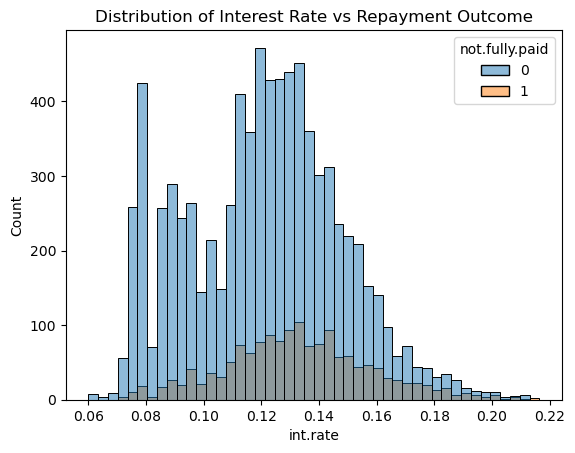

In [496]:
# Distribution of Interest rate
sns.histplot(x=df['int.rate'],hue=df['not.fully.paid']).set_title("Distribution of Interest Rate vs Repayment Outcome")

From the stacked histogram above, we observe that the distribution of interest rates for borrowers who defaulted on their loans is similar to that of borrowers who repaid their loans. The interest rate for both classes is normally distributed around their respective means as shown by summary of each class's  descriptive statistics.  

In [497]:
# Descriptive statistics for interest rate of borrowers who defaulted on their loans. 
df[df['not.fully.paid']==0]['int.rate'].describe()

count    8045.000000
mean        0.120770
std         0.026692
min         0.060000
25%         0.099600
50%         0.121800
75%         0.138700
max         0.212100
Name: int.rate, dtype: float64

In [498]:
# Descriptive statistics for interest rate of borrowers who repaid their loans. 
df[df['not.fully.paid']==1]['int.rate'].describe()

count    1533.000000
mean        0.132452
std         0.025495
min         0.070500
25%         0.115400
50%         0.131600
75%         0.148200
max         0.216400
Name: int.rate, dtype: float64

#### Plot 8: A Stacked histogram to show the Distribution of Monthly installments and Repayment Outcomes for Borrowers 

Text(0.5, 1.0, 'Distribution of Monthly Installments vs Repayment Outcomes')

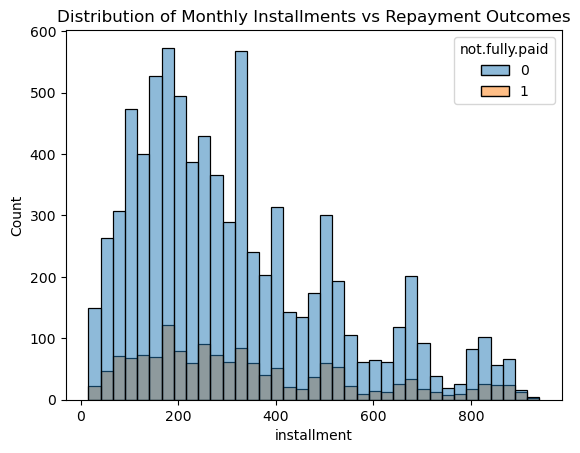

In [499]:
#Distribution of Monthly installments 
sns.histplot(x=df['installment'],hue=df['not.fully.paid']).set_title("Distribution of Monthly Installments vs Repayment Outcomes")

From the stacked histogram above, we observe that the monthly installments for borrowers who defaulted is similar to that of borrowers who repaid their loans. Both classes of borrowers have normally distributed interest rates around their respective means as computed below. 

In [500]:
# Descriptive statistics for Monthly Installment for borrowers who defaulted on their loans. 
df[df['not.fully.paid']==0]['installment'].describe()

count    8045.000000
mean      314.574123
std       203.398688
min        15.670000
25%       162.250000
50%       266.520000
75%       423.950000
max       940.140000
Name: installment, dtype: float64

In [501]:
# Descriptive statistics for Monthly Installment for borrowers who repaid their loans. 
df[df['not.fully.paid']==1]['installment'].describe()

count    1533.000000
mean      342.785114
std       223.948527
min        15.910000
25%       168.640000
50%       287.310000
75%       491.300000
max       926.830000
Name: installment, dtype: float64

#### Plot 9: A Stacked histogram to show the Distribution of fico score and Repayment Outcomes for Borrowers 

Text(0.5, 1.0, 'Distribution of fico Score VS Repayment Outcome')

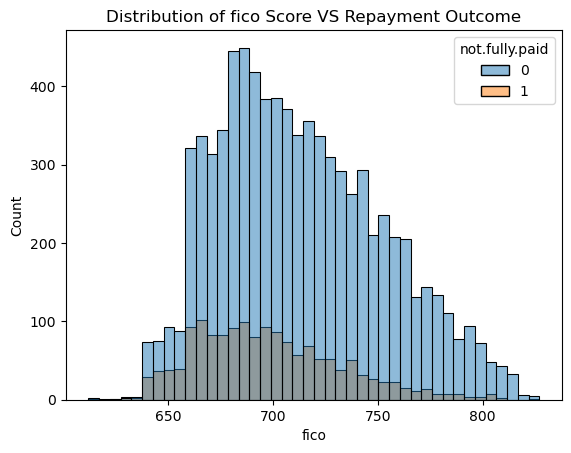

In [502]:
# Distribution of fico score 
sns.histplot(x=df['fico'],hue=df['not.fully.paid']).set_title("Distribution of fico Score VS Repayment Outcome")

#### Plot 10: A Joint plot showing the relationship between fico score and Interest Rate charged on loans

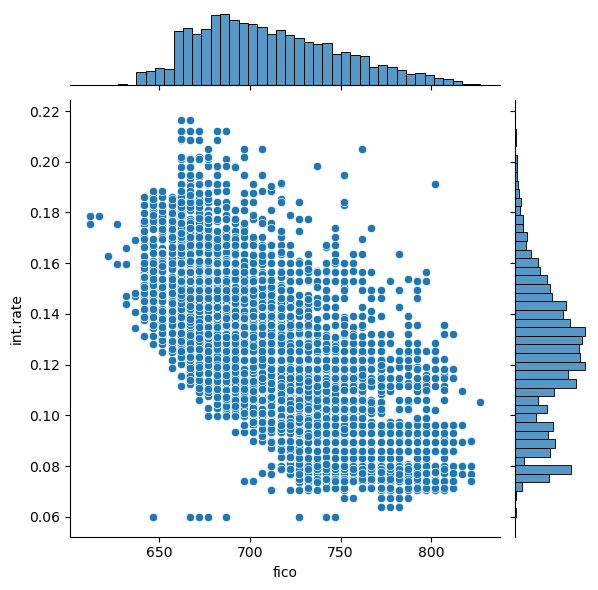

In [503]:
sns.jointplot(x=df['fico'],y=df['int.rate'])

#### Plot 11: A Joint plot showing the relationship between Days a Borrower has had a Credit Line and Interest Rate charged on loans

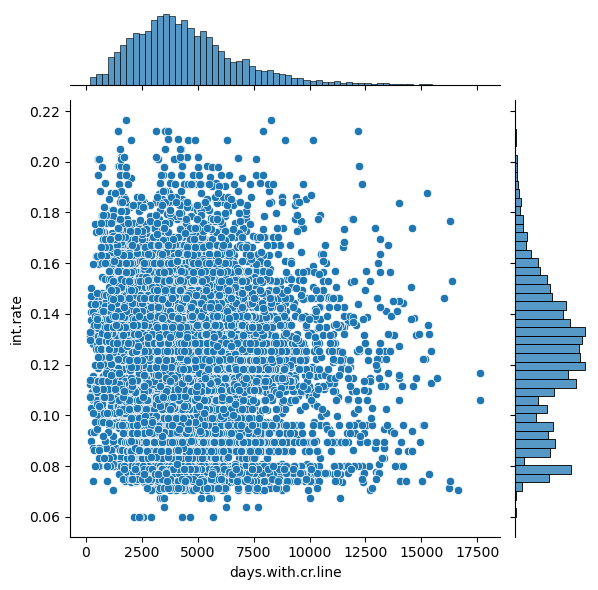

In [504]:
sns.jointplot(x=df['days.with.cr.line'],y=df['int.rate'])

#### Plot 12: A Joint plot showing the relationship between fico score and Debt to Income Ratio of Borrowers

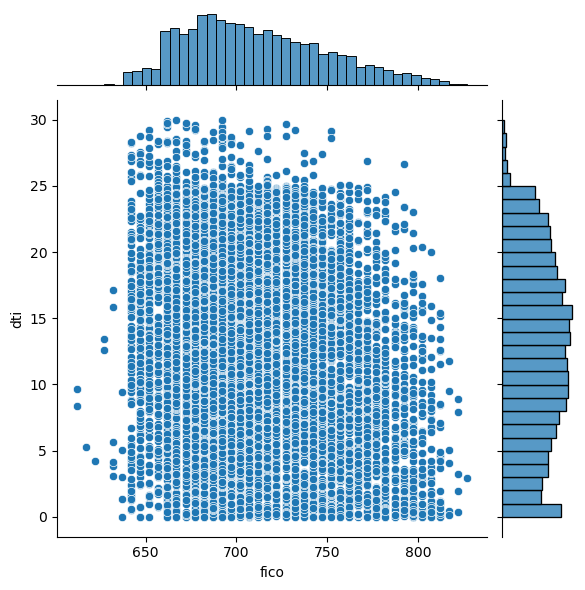

In [505]:
sns.jointplot(x=df['fico'],y=df['dti'])

## Step 4: Data Processing & Model Building

Under this section, we will prepare our data for modeling by performing the following steps:

1. **Encoding Categorical Variables:** As our dataset may contain categorical variables, we will convert them into a numerical representation suitable for machine learning algorithms. This process is known as encoding.

2. **Resampling the Data:** We will address the issue of class imbalance in the target variable. Since this is a classification problem, imbalanced classes can negatively impact model performance. We will use resampling techniques to balance the classes and improve the model's ability to accurately predict both classes.

Once the data is appropriately prepared, we will proceed with building predictive models using Decision Trees and other ensemble versions of the model, such as Random Forests, Ada Boosting, and Gradient Boosting. These ensemble methods combine multiple weaker learners to create a more robust and accurate model.

By comparing the performance of these models on the same dataset, we can make an informed decision on the best model to use for this credit default prediction problem. Evaluating and understanding the strengths and weaknesses of each model will allow us to choose the most suitable model to achieve our prediction goals effectively.


In [506]:
# Encoding the purpose column 
df=pd.get_dummies(data=df,columns=['purpose'],drop_first=True)
df.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0


In [507]:
# Defining our independent and dependent variables 
x=df[df.columns.drop('not.fully.paid')]
#x.shape
y=df['not.fully.paid']
#y.shape

In [508]:
# Under_sampling our data to fix class imbalance in the target variable 
import imblearn 
from imblearn.under_sampling import RandomUnderSampler
Usampler=RandomUnderSampler(replacement=True)
x_s,y_s=Usampler.fit_resample(x,y)

In [509]:
# Splitting our data into test and train set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y_s)

## Step 5: Building the model

In [510]:
# Model 1: Decision Tree
# Fitting model to data
from sklearn.tree import DecisionTreeClassifier
dtm=DecisionTreeClassifier()
dtm.fit(x_train,y_train)

# Obtaining predictions 
pred=dtm.predict(x_test)

#Evaluating model performance 
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,pred)
print(report)


              precision    recall  f1-score   support

           0       0.66      0.58      0.62       418
           1       0.56      0.64      0.60       349

    accuracy                           0.61       767
   macro avg       0.61      0.61      0.61       767
weighted avg       0.62      0.61      0.61       767



### Decision Tree Model Performance for Predicting Defaults

The explanation discusses the performance of a Decision Tree model in predicting credit defaults. The model uses precision, recall, and F1-score metrics to evaluate its accuracy. Here's a summary of the key points:

- Precision:
The model accurately predicts defaults about 56% of the time and non-defaults about 55% of the time.
- Recall:
The model correctly identifies approximately 54% of the actual defaults, but it may miss 46% of the defaults.
- F1-score:
The model achieves a balanced performance with an F1-score of 0.56 for non-defaults and 0.55 for defaults.
- Support:
The model was evaluated on 767 borrowers, with 383 non-defaults and 384 defaults.


In [511]:
# Model 2: Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

# Obtaining predictions 
pred=rfc.predict(x_test)

#Evaluating model performance 
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,pred)
print(report)


              precision    recall  f1-score   support

           0       0.71      0.62      0.66       418
           1       0.60      0.69      0.64       349

    accuracy                           0.65       767
   macro avg       0.66      0.66      0.65       767
weighted avg       0.66      0.65      0.65       767



### Random Forest Model Performance for Predicting Defaults

The Random Forest model used for predicting credit defaults shows reasonably balanced performance with precision, recall, and F1-score around 0.62 for both non-defaulters and defaulters. This means that approximately 62% of predicted non-defaulters and defaulters are accurate. The model correctly identifies about 62% of non-default cases and approximately 63% of actual defaults. 

The accuracy of the model is 62%, which means it predicts 62% of the credit default status correctly. There are 383 instances of non-defaults and 384 instances of defaults in the dataset. The model's performance should be further evaluated and fine-tuned to improve results considering the business context and specific credit default prediction requirements.

In [512]:
# Model 3: Ada Boost
from sklearn.ensemble import AdaBoostClassifier
Adabm=AdaBoostClassifier()

# Fitting model to data 
Adabm.fit(x_train,y_train)

#Obtaining predictions 
pred=Adabm.predict(x_test)

#Evaluating model performance 
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       418
           1       0.57      0.65      0.61       349

    accuracy                           0.62       767
   macro avg       0.62      0.62      0.62       767
weighted avg       0.63      0.62      0.62       767



### AdaBoost Model Performance for Predicting Defaults

The AdaBoost model demonstrates balanced performance in predicting credit defaults with precision, recall, and F1-score all around 0.59 for both non-defaulters and defaulters. This means that approximately 59% of predicted non-defaulters and defaulters are accurate. The model correctly identifies about 60% of non-default cases and around 58% of actual defaults. 

The accuracy of the model is 59%, indicating that it predicts 59% of the credit default status correctly. There are 383 instances of non-defaults and 384 instances of defaults in the dataset. The model's performance can be further improved through hyperparameter tuning or additional feature engineering to achieve higher accuracy. 

In [513]:
# Model 4: Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
Gboost=GradientBoostingClassifier()

# Fitting model to data 
Gboost.fit(x_train,y_train)

#Obtaining predictions 
pred=Gboost.predict(x_test)

#Evaluating model performance 
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       418
           1       0.58      0.69      0.63       349

    accuracy                           0.63       767
   macro avg       0.63      0.63      0.63       767
weighted avg       0.64      0.63      0.63       767



#### Summary of Gradient Boost Model Performance

The precision for both classes is approximately 0.61 and 0.62, respectively, meaning that around 61% of the borrowers predicted as non-defaulters are indeed non-defaulters, and about 62% of the borrowers predicted as defaulters actually defaulted.

The recall for non-defaults is approximately 0.64, indicating that the model correctly identifies 64% of the non-default cases. For defaults, the recall is about 0.60, meaning that the model captures approximately 60% of the actual defaults.

The F1-score, which considers both precision and recall, is approximately 0.62 for non-defaults and 0.61 for defaults. This indicates reasonably balanced performance in predicting both non-defaulters and defaulters.

The model's overall accuracy is approximately 0.62, meaning that it correctly predicts the credit default status for 62% of the borrowers in the dataset.

In [514]:
# Model 5: Gradient Boost
from sklearn.ensemble import HistGradientBoostingClassifier
Histboostmodel=HistGradientBoostingClassifier()

# Fitting model to data 
Histboostmodel.fit(x_train,y_train)

#Obtaining predictions 
pred=Histboostmodel.predict(x_test)

#Evaluating model performance 
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       418
           1       0.60      0.69      0.64       349

    accuracy                           0.65       767
   macro avg       0.65      0.65      0.65       767
weighted avg       0.65      0.65      0.65       767



#### Summary of HistGradient Boosting Classifier Model Performance

The classification report presents the performance metrics of a HistGradient Boosting Classifier model used for predicting credit defaults. 

- **Class 0 (non-defaults):** The model achieved an F1-score of approximately 0.64, indicating reasonably balanced performance in predicting non-defaults. The precision and recall are around 64% and 63%, respectively.

- **Class 1 (defaults):** For default predictions, the model achieved an F1-score of approximately 0.65, with precision and recall around 64% and 65%, respectively.

- **Overall Performance:** The model's accuracy is approximately 64%, indicating its ability to correctly predict the credit default status for 64% of the borrowers in the dataset.

In summary, the HistGradient Boosting Classifier model demonstrates balanced performance in predicting both non-defaulters and defaulters, with an overall accuracy of 64%. The F1-score indicates reasonably balanced precision and recall for both classes. While the model shows promising results, there may still be opportunities for further optimization or fine-tuning to achieve even better performance. Regular monitoring and updates to the model will be essential to maintain its effectiveness over time and support informed decision-making in credit risk assessment.


## Conclusion 

### Summary of Model Performance for Credit Default Prediction

The performance metrics of three models (Decision Tree, Random Forest, and Gradient Boost) for predicting credit defaults were shared. All three models show reasonably balanced performance in predicting both non-defaulters and defaulters, with accuracy, precision, recall, and F1-scores ranging from approximately 0.62 to 0.64.

- **Decision Tree Model:** The Decision Tree model is simple and interpretable, making it suitable for cases where interpretability is a priority.

- **Random Forest and Gradient Boost Models:** The Random Forest and Gradient Boost models are ensemble methods, offering better predictive accuracy by combining the strength of multiple decision trees.

However, the final choice of the best model should consider factors beyond performance metrics, including interpretability needs, project requirements, and business context. Further experimentation, fine-tuning, and cross-validation on a separate test set are essential to make an informed decision on the most suitable model for this specific credit default prediction problem. Ensuring that the chosen model generalizes well to unseen data is crucial for reliable model selection.

### N/B: The metric values for all the models discussed above might vary with each instance of the script being executed because of the random nature of certain algorithms (e.g., Random Forest and Gradient Boost) and the inherent randomness in data splitting during training and testing. These variations are normal and do not necessarily indicate a significant change in model performance. It is essential to interpret the results in the context of these random fluctuations and consider multiple runs to obtain a more robust assessment of the models' effectiveness.
